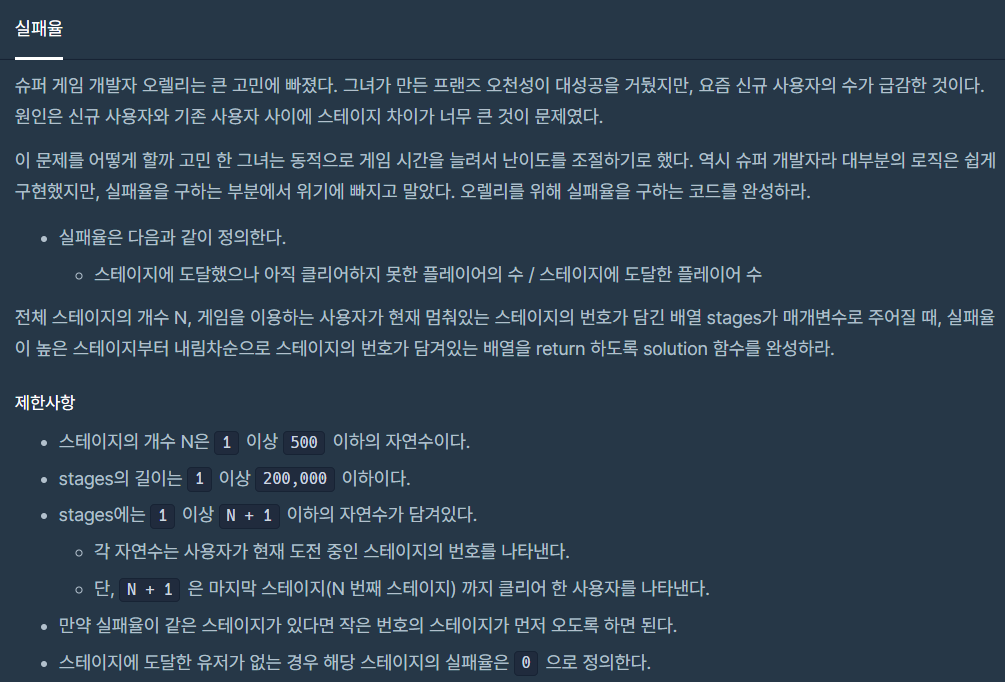

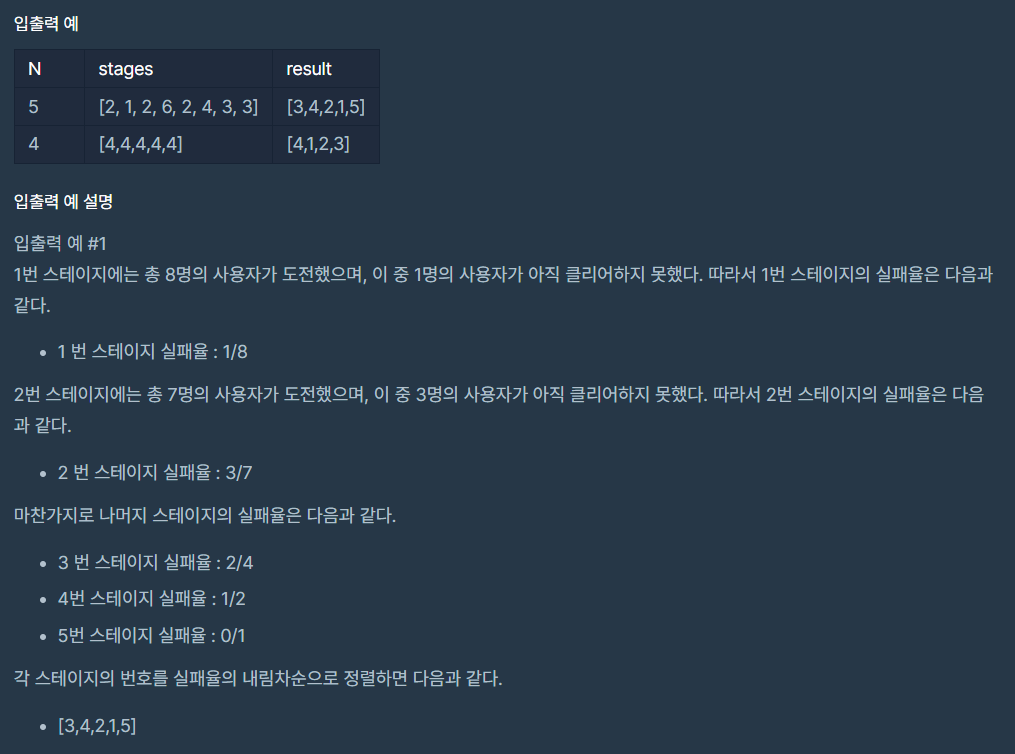

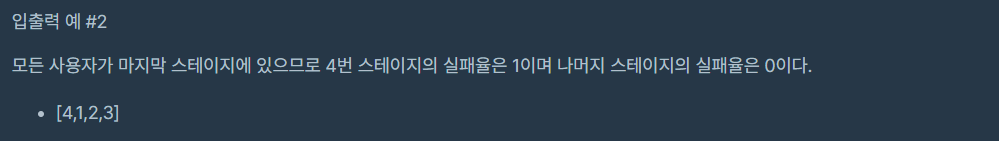

* 예제 1의 절차 시각화  
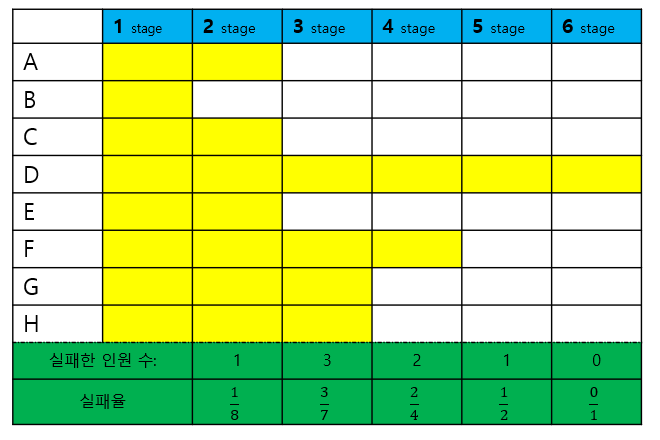

In [1]:
N = 4 # 스테이지 수
stages = [4,4,4,4,4]# 각 참가자가 클리어한 스테이지 state

# 실패율을 구하는 코드 작성
## 2차원 배열에 False로 채운 리스트 만들기
- 2차원 배열을 만들어 False를 N+1의 갯수만큼 만들기
- 만약 클리어를 했으면 True로 바꾸는 컨셉

In [2]:
N_bucket = [False] * (N +1)
total_bucket = []
stages_sort = sorted(stages)

for i in stages_sort:
    N_bucket = [False] * (N +1)
    for z in range(i):
        if z+1:
            N_bucket[z] = True
    total_bucket.append(N_bucket)
    
total_bucket

[[True, True, True, True, False],
 [True, True, True, True, False],
 [True, True, True, True, False],
 [True, True, True, True, False],
 [True, True, True, True, False]]

In [3]:
score_bucket = [ ]
for i in range(len(N_bucket)):
    cnt = 0
    for z in range(len(total_bucket)):
        cnt += total_bucket[z][i]
    score_bucket.append(cnt)

score_bucket

[5, 5, 5, 5, 0]

In [4]:
t = []
cnt = 1
for i in score_bucket[:-1]:
    t.append((i-score_bucket[cnt])/i)
    cnt += 1
a = [ ]
for i in sorted(t, reverse=True):
    a.append(t.index(i)+1)


print(a)

[4, 1, 1, 1]


## 스테이지에 도달하지 못한 플레이어 제외하기
코드를 작성하다가 하나의 조건을 잊고 있었다.  
"스테이지에 도달했으나 아직 클리어하지 못한 플레이어의 수 / 스테이지에 도달한 플레이어 수"  
-> 스테이지의 실패율을 구할 때 마다 스테이지 도달하지 못한 플레이어 수를 제외해야 한다!

In [5]:
import numpy as np

total_bucket = []
stages_sort = sorted(stages)

for i in stages_sort:
    N_bucket = [False] * (N +1)
    for z in range(i):
        if z+1:
            N_bucket[z] = True
    total_bucket.append(N_bucket)

total_bucket = np.array(total_bucket)
total_bucket

array([[ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False]])

1 스테이지 클리어율을 측정할 때 합이 2 이상인 사람 중에 측정해야 함

In [6]:
list = []
for z in range(N+1):
    a= 0
    for i in total_bucket:
        if sum(i[np.where(sum(i) > z)]) == 1:
            a += 1
    list.append(a)
list

[5, 5, 5, 5, 0]

In [7]:
try:
    for i in range(len(N_bucket)):
        cnt = 0
        for z in range(len(total_bucket)):
            cnt += total_bucket[z][i]
            print(cnt)
except:
    pass
cnt

1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
0
0
0
0
0


0

# 다른 사람의 풀이
* 내가 생각한 방식은 풀기가 복잡해짐을 깨달았다(소요 시간:5시간 )
* 다른 사람들은 어떻게 풀었는지 그 코드를 분해해보기로 했다.

## Dictonary의 key를 이용한 풀이

In [8]:
N = 12
stages =[2, 1, 2, 6, 2, 4, 3, 3]

result = {}
denominator = len(stages)

print("result: ",result) # 새로운 dictionary를 만든다.
print("denominator: ", denominator)  # 실패율의 분모부분을 담당

result:  {}
denominator:  8


In [9]:
N = 12
stages =[2, 1, 2, 6, 2, 4, 3, 3]

result = {}
denominator = len(stages)

for i, stage in enumerate(range(1, N+1), start=1):  # 게임 시작이 1stage부터 시작하며 range는 n-1까지의 범위로 iteration하기 떄문에 N+1
        if denominator != 0: # Stage 수가 클리어 인원 작거나 같을 때를 담당
            count = stages.count(stage)
            print(i, '번째 스테이지에서 ',count,'명이 실패하였다.')
            result[stage] = count / denominator # 실패율을 구하고 이를 value값으로 stage를 key값으로 추가 (stage는 iteration으로 1부터 높아진다.)
            print(i, '번째 스테이지에서의 dict: ', result)

            denominator -= count # 다음 스테이지의 참가하는 인원수를 update한다.
            print(i, '번째 스테이지에서의 참가자 수: ',denominator)
            print()

1 번째 스테이지에서  1 명이 실패하였다.
1 번째 스테이지에서의 dict:  {1: 0.125}
1 번째 스테이지에서의 참가자 수:  7

2 번째 스테이지에서  3 명이 실패하였다.
2 번째 스테이지에서의 dict:  {1: 0.125, 2: 0.42857142857142855}
2 번째 스테이지에서의 참가자 수:  4

3 번째 스테이지에서  2 명이 실패하였다.
3 번째 스테이지에서의 dict:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5}
3 번째 스테이지에서의 참가자 수:  2

4 번째 스테이지에서  1 명이 실패하였다.
4 번째 스테이지에서의 dict:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5}
4 번째 스테이지에서의 참가자 수:  1

5 번째 스테이지에서  0 명이 실패하였다.
5 번째 스테이지에서의 dict:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0}
5 번째 스테이지에서의 참가자 수:  1

6 번째 스테이지에서  1 명이 실패하였다.
6 번째 스테이지에서의 dict:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0}
6 번째 스테이지에서의 참가자 수:  0



In [10]:
N = 12
stages =[2, 1, 2, 6, 2, 4, 3, 3]

result = {}
denominator = len(stages)

for i, stage in enumerate(range(1, N+1), start=1):  
        if denominator != 0:
            count = stages.count(stage)
            result[stage] = count / denominator 
            denominator -= count 
        else: # 이 조건은 참가자들이 모두 실패한 스테이지가 있을 때의 조건이다.
            result[stage] = 0  # 이 예시에서 7 스테이지 이상부터는 도전이 가능한 인원이 없다.
                               # 위의 if절에서 denominator -= count이 조건이 7 스테이지부터 0이 된다.
                               # in 6 stage: deminator(=1) -= count(=1) => 0
                               # 스테이지는 존재하지만 도전자가 없는 스테이지의 value 값을 0으로 지정
            print(i, '번째부터의 result: ', result)

7 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0}
8 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0}
9 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0, 9: 0}
10 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0, 9: 0, 10: 0}
11 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}
12 번째부터의 result:  {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}


In [11]:
N = 12
stages =[2, 1, 2, 6, 2, 4, 3, 3]

result = {}
denominator = len(stages)
for stage in range(1, N+1):
    if denominator != 0:
        count = stages.count(stage)
        result[stage] = count / denominator
        denominator -= count
    else:
        result[stage] = 0

answer = sorted(result, key=lambda x : result[x], reverse=True)
# return 값으로 sorted를 이용하여 정렬을 한다.
# reverse=True를 통해 오름차순으로 정렬하며
# key=lambda x: result[x]를 통해 key의 정렬을 value값 기준으로 리턴 
print('sorted에 들어가기 전의 result: \n',result,'\n')
print('sorted절에 reverse=True가 없다면: \n',sorted(result, key=lambda x : result[x]),'\n')
print('sorted절에 lambda가 없다면: \n',sorted(result, reverse=True))
answer

sorted에 들어가기 전의 result: 
 {1: 0.125, 2: 0.42857142857142855, 3: 0.5, 4: 0.5, 5: 0.0, 6: 1.0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0} 

sorted절에 reverse=True가 없다면: 
 [5, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 6] 

sorted절에 lambda가 없다면: 
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


[6, 3, 4, 2, 1, 5, 7, 8, 9, 10, 11, 12]